In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch10 N차원 배열 다루기</font>

- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지

# 1절. 넘파이 패키지

In [6]:
import numpy as np

np.__version__

'1.23.5'

In [7]:
# np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성

a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [10]:
from numpy import arange

a = arange(15).reshape(3, 5)  # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
type(a)  # a변수의 타입

numpy.ndarray

In [12]:
a.dtype  # a배열 요소의 type

dtype('int32')

In [13]:
a.dtype.name

'int32'

In [14]:
a.itemsize  # 한 요소의 bytesize

4

In [15]:
a.ndim  # 차원수(축수)

2

In [16]:
a.size  # 배열 요소 갯수

15

In [17]:
a.shape  # 배열 구조 (튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [19]:
print('구조변경 전', a, sep = '\n')
a.shape = (5, 3)
print('구조변경 후', a, sep = '\n')

구조변경 전
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [26]:
# 타입변경(X)

a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a.dtype

dtype('int32')

In [28]:
a.itemsize

4

In [29]:
a.size, a.shape  # 12개 요소 3행4열

(12, (3, 4))

In [31]:
a.dtype = np.int64  # a 배열 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [32]:
a.itemsize

8

In [33]:
a.size, a.shape

(6, (3, 2))

In [34]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [35]:
# 타입변경(O)

a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
a = a.astype(np.int64)  # a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [37]:
a.dtype

dtype('int64')

In [38]:
a.itemsize

8

In [39]:
a.size, a.shape

(12, (3, 4))

In [40]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [41]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [42]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

In [43]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [44]:
import pickle

with open('data/ch10_a.pkl', 'wb') as f :
    pickle.dump(a, f)

In [46]:
with open('data/ch10_a.pkl', 'rb') as f :
    load_a = pickle.load(f)

In [47]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [48]:
a == load_a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [49]:
np.all(a == load_a)  # a 넘파이 배열과 load_a 넘파이 배열이 같은지

True

In [50]:
np.save('data/ch10_a.npy', a)

In [52]:
load_a2 = np.load('data/ch10_a.npy')
np.all(a == load_a2)

True

# 2절. 넘파이 배열

- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들 ...

## 2.1 array() 함수로 넘파이 배열 만들기

- array(list나 tuple, dtype = np.xxx, copy = True/False)

In [56]:
a = np.array([2, 4, 6], dtype = np.int8)  # 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [58]:
a[0], a[1], a[2]

(2, 4, 6)

In [59]:
a.dtype

dtype('int8')

In [62]:
b = np.array([[1.3, 2.4], [4, 5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [63]:
b.dtype

dtype('float64')

In [65]:
b = np.array([[1.3, 2.4], [4, 5]], dtype = np.float32).reshape(1, 4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [66]:
b.itemsize

4

In [67]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [68]:
l = [[1, 2], [3.4, 4.5]]

for row in l :
    for data in row :
        print(data, end = '\t')
    print()

1	2	
3.4	4.5	


In [69]:
c = np.array([[1, 2], [3.4, 4.5]], dtype = np.float16)

for i, row in enumerate(c) :
    for j, item in enumerate(row) :
        print('{}행{}열:{}'.format(i, j, item), end = '\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.400390625	1행1열:4.5	


In [72]:
c = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype = np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [73]:
c[0, 3]

4

In [75]:
c[:, 1:3]  # 모든행, 1열부터 3열앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [76]:
c[0, 2:5]  # 0행 2열~4열까지

array([3, 4, 5], dtype=int16)

In [77]:
# 모든행의 맨 마지막 열만 추출

c[:, -1]

array([ 5, 10], dtype=int16)

In [79]:
# 모든행의 맨 마지막 열을 제외한 추출

c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [86]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=False) # d=c 얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소=2498523479376, d주소:2498523479376


In [87]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=True) # d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=2498523729808, d주소:2498523741328


## 2.2 기본값이 있는 배열만들기

- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값 (메모리 상태에 따라 달라짐)
- 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성 따라 지정 가능

In [81]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [82]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [84]:
np.full((2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [85]:
np.empty((2, 5))

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열 만들기

- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low = 0, high = 1.0, size = tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc = 0, scale = 1.0, size = tup) : 평균loc와 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균이 0, 표준편차가 1인 정규분포)의 1차원 난수 배열 발생 (난수 n개)
- cf. np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

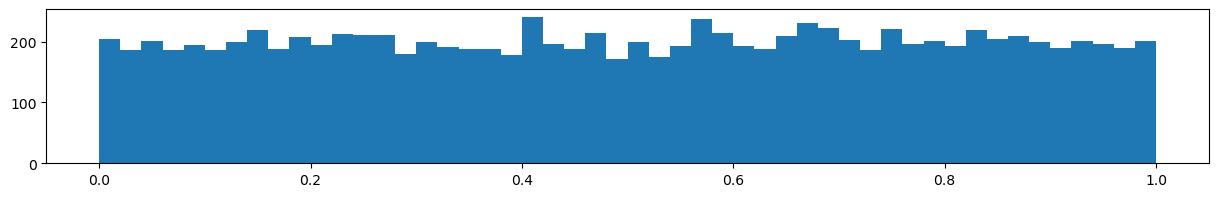

In [91]:
import matplotlib.pyplot as plt

x = np.random.rand(10000)
plt.figure(figsize = (15, 2))  # 그래프 크기 figsize = (가로, 세로)
plt.hist(x, bins = 50)
plt.show()

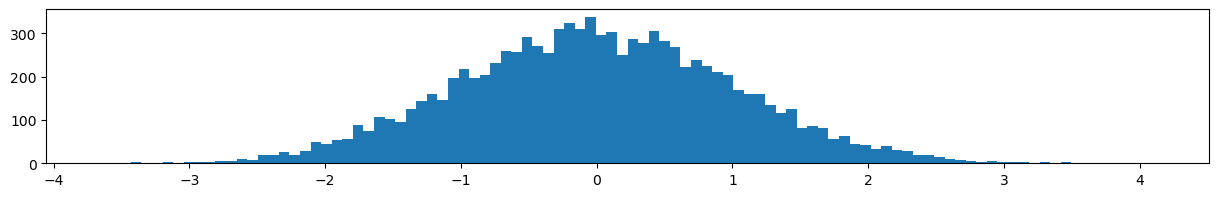

In [93]:
x = np.random.randn(10000)
plt.figure(figsize = (15, 2))  # 그래프 크기 figsize = (가로, 세로)
plt.hist(x, bins = 100)
plt.show()

In [95]:
# 2차원 난수 배열

np.random.seed(12)  # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2, 5))  # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [97]:
np.random.uniform(-1, 10, (2, 5))  # -1부터 10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [98]:
np.random.normal(10, 2, (2, 5))  # 평균 10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기

- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열

In [99]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [100]:
# linspace : 많은 수의 점들을 생성

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

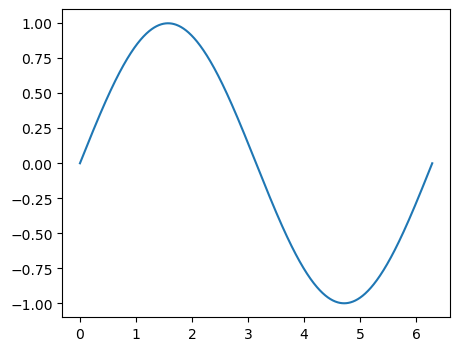

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 4))
plt.plot(x, y)
plt.show()

In [103]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [104]:
np.arange(10, 30, 3, dtype = np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기

- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
- 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [105]:
a = np.random.random((2, 3))
a

array([[0.76747565, 0.82500925, 0.4066403 ],
       [0.45130841, 0.40063163, 0.99513816]])

In [108]:
a = np.round(a * 10)  # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [109]:
a = a.reshape(3, 2)
a

array([[ 8.,  8.],
       [ 4.,  5.],
       [ 4., 10.]])

In [112]:
a.reshape(2, -1)  # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [115]:
a.reshape(-1, 1)

array([[ 8.],
       [ 8.],
       [ 4.],
       [ 5.],
       [ 4.],
       [10.]])

In [116]:
a.resize((2, 3))  # 결과를 출력하지 않는 함수는 배열 자체를 바꿈 -1불가

In [117]:
a

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])